[View in Colaboratory](https://colab.research.google.com/github/webserg/pythonML/blob/master/colab/plankton.ipynb)

https://www.kaggle.com/c/datasciencebowl/data
http://benanne.github.io/2015/03/17/plankton.html


In [3]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d6/3c/92/375decc0cf0a65b281db3cca9b8e21dc27b8ebc4d1ce29afca
Successfully built kaggle


In [4]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [13]:
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
imagenet-object-detection-challenge             2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-detection-from-video-challenge  2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-localization-challenge          2029-12-31 07:00:00  Research         Knowledge          8           False  
titanic                                         2020-04-07 00:00:00  Getting Started  Knowledge      11326            True  
house-prices-advanced-regression-techniques     2020-03-01 23:59:00  Getting Started  Knowledge       5397           False  
digit-recognizer                                2020-01-07 00:00:00  Getting Started  Knowledge       2506           False  


In [5]:
!pwd

/content


In [0]:
!mkdir datasciencebowl

In [7]:
!ls -l

total 8
drwxr-xr-x 1 root root 4096 May 19 13:12 datalab
drwxr-xr-x 2 root root 4096 May 19 13:13 datasciencebowl


In [8]:
!kaggle competitions download -c datasciencebowl -p ./plankton

sampleSubmission.csv.zip: Downloaded 886KB of 886KB to ./plankton
train.zip: Downloaded 76MB of 76MB to ./plankton
test.zip: Downloaded 347MB of 347MB to ./plankton
plankton_identification.pdf: Downloaded 2MB of 2MB to ./plankton


In [9]:
%cd /content/plankton/validation/

[Errno 2] No such file or directory: '/content/plankton/validation/'
/content


In [10]:
%ls -l

total 12
drwxr-xr-x 1 root root 4096 May 19 13:12 datalab/
drwxr-xr-x 2 root root 4096 May 19 13:13 datasciencebowl/
drwxr-xr-x 2 root root 4096 May 19 13:13 plankton/


In [11]:
import zipfile
import os
data_dir = "/content/plankton"
path_to_data = "/content/plankton/train.zip"
path_to_data

'/content/plankton/train.zip'

In [0]:
if os.path.exists(data_dir) == False:
    os.makedirs(data_dir)

In [0]:
zip_ref = zipfile.ZipFile(path_to_data, 'r')
zip_ref.extractall(data_dir)
zip_ref.close()

In [14]:
path_to_test = "/content/plankton/test.zip"
path_to_test

'/content/plankton/test.zip'

In [0]:
 os.makedirs(data_dir + "/test")

In [0]:
zip_ref = zipfile.ZipFile(path_to_test, 'r')
zip_ref.extractall(data_dir + "/test")
zip_ref.close()

In [0]:
validation_dir = os.path.join(data_dir, 'validation')
if os.path.exists(validation_dir) == False:
    os.mkdir(validation_dir)

In [0]:
import shutil
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [19]:
validation_dir = os.path.join(data_dir, 'validation')

dir_info = [x for x in os.walk(train_dir)]
for dir in dir_info[1:]:
    print(len(dir[2]))
    validation_number = int(round(len(dir[2])/10))
    print(validation_number)
    print(dir[2])
    print(dir[2][:validation_number])
    dir_name = os.path.split(dir[0])[1]
    print(dir_name)
    validation_dir_current = os.path.join(validation_dir, dir_name)
    if os.path.exists(validation_dir_current) == False:
        os.mkdir(validation_dir_current)
    for fname in dir[2][:validation_number]:
        src = os.path.join(train_dir, dir_name, fname)
        dst = os.path.join(validation_dir_current, fname)
        print(src)
        print(dst)
        shutil.move(src, dst)


201
20
['6529.jpg', '74803.jpg', '80162.jpg', '71270.jpg', '5466.jpg', '44932.jpg', '104144.jpg', '60708.jpg', '22603.jpg', '71381.jpg', '43986.jpg', '127712.jpg', '107073.jpg', '96665.jpg', '28978.jpg', '54263.jpg', '37038.jpg', '105800.jpg', '30357.jpg', '91351.jpg', '66694.jpg', '14022.jpg', '108537.jpg', '13167.jpg', '82640.jpg', '9193.jpg', '155379.jpg', '139563.jpg', '137039.jpg', '134442.jpg', '97937.jpg', '15257.jpg', '121017.jpg', '129290.jpg', '51895.jpg', '13650.jpg', '89574.jpg', '113096.jpg', '122704.jpg', '101702.jpg', '124815.jpg', '54586.jpg', '111194.jpg', '21378.jpg', '123900.jpg', '65455.jpg', '45717.jpg', '68703.jpg', '63247.jpg', '122409.jpg', '77976.jpg', '134900.jpg', '39565.jpg', '67227.jpg', '107965.jpg', '63881.jpg', '26747.jpg', '80293.jpg', '52829.jpg', '7751.jpg', '89523.jpg', '3822.jpg', '63577.jpg', '64802.jpg', '156666.jpg', '116974.jpg', '75388.jpg', '144014.jpg', '137327.jpg', '104926.jpg', '109190.jpg', '118638.jpg', '93449.jpg', '153152.jpg', '44579.


/content/plankton/validation/radiolarian_colony/12822.jpg
/content/plankton/train/radiolarian_colony/109028.jpg
/content/plankton/validation/radiolarian_colony/109028.jpg
/content/plankton/train/radiolarian_colony/118296.jpg
/content/plankton/validation/radiolarian_colony/118296.jpg
/content/plankton/train/radiolarian_colony/85488.jpg
/content/plankton/validation/radiolarian_colony/85488.jpg
/content/plankton/train/radiolarian_colony/38635.jpg
/content/plankton/validation/radiolarian_colony/38635.jpg
/content/plankton/train/radiolarian_colony/5163.jpg
/content/plankton/validation/radiolarian_colony/5163.jpg
/content/plankton/train/radiolarian_colony/76956.jpg
/content/plankton/validation/radiolarian_colony/76956.jpg
/content/plankton/train/radiolarian_colony/90714.jpg
/content/plankton/validation/radiolarian_colony/90714.jpg
/content/plankton/train/radiolarian_colony/142873.jpg
/content/plankton/validation/radiolarian_colony/142873.jpg
/content/plankton/train/radiolarian_colony/151705


/content/plankton/train/copepod_calanoid/115105.jpg
/content/plankton/validation/copepod_calanoid/115105.jpg
/content/plankton/train/copepod_calanoid/85699.jpg
/content/plankton/validation/copepod_calanoid/85699.jpg
/content/plankton/train/copepod_calanoid/31452.jpg
/content/plankton/validation/copepod_calanoid/31452.jpg
/content/plankton/train/copepod_calanoid/40897.jpg
/content/plankton/validation/copepod_calanoid/40897.jpg
/content/plankton/train/copepod_calanoid/62684.jpg
/content/plankton/validation/copepod_calanoid/62684.jpg
/content/plankton/train/copepod_calanoid/24156.jpg
/content/plankton/validation/copepod_calanoid/24156.jpg
/content/plankton/train/copepod_calanoid/46233.jpg
/content/plankton/validation/copepod_calanoid/46233.jpg
/content/plankton/train/copepod_calanoid/8801.jpg
/content/plankton/validation/copepod_calanoid/8801.jpg
/content/plankton/train/copepod_calanoid/146420.jpg
/content/plankton/validation/copepod_calanoid/146420.jpg
/content/plankton/train/copepod_ca

/content/plankton/train/detritus_other/112692.jpg
/content/plankton/validation/detritus_other/112692.jpg
/content/plankton/train/detritus_other/120072.jpg
/content/plankton/validation/detritus_other/120072.jpg
/content/plankton/train/detritus_other/134606.jpg
/content/plankton/validation/detritus_other/134606.jpg
/content/plankton/train/detritus_other/19921.jpg
/content/plankton/validation/detritus_other/19921.jpg
/content/plankton/train/detritus_other/6394.jpg
/content/plankton/validation/detritus_other/6394.jpg
/content/plankton/train/detritus_other/44716.jpg
/content/plankton/validation/detritus_other/44716.jpg
/content/plankton/train/detritus_other/145880.jpg
/content/plankton/validation/detritus_other/145880.jpg
/content/plankton/train/detritus_other/79349.jpg
/content/plankton/validation/detritus_other/79349.jpg
/content/plankton/train/detritus_other/108841.jpg
/content/plankton/validation/detritus_other/108841.jpg
/content/plankton/train/detritus_other/6860.jpg
/content/plankton


/content/plankton/validation/chaetognath_other/99326.jpg
/content/plankton/train/chaetognath_other/98276.jpg
/content/plankton/validation/chaetognath_other/98276.jpg
/content/plankton/train/chaetognath_other/46017.jpg
/content/plankton/validation/chaetognath_other/46017.jpg
/content/plankton/train/chaetognath_other/8014.jpg
/content/plankton/validation/chaetognath_other/8014.jpg
/content/plankton/train/chaetognath_other/140468.jpg
/content/plankton/validation/chaetognath_other/140468.jpg
/content/plankton/train/chaetognath_other/84268.jpg
/content/plankton/validation/chaetognath_other/84268.jpg
/content/plankton/train/chaetognath_other/68196.jpg
/content/plankton/validation/chaetognath_other/68196.jpg
/content/plankton/train/chaetognath_other/31191.jpg
/content/plankton/validation/chaetognath_other/31191.jpg
/content/plankton/train/chaetognath_other/13513.jpg
/content/plankton/validation/chaetognath_other/13513.jpg
/content/plankton/train/chaetognath_other/95273.jpg
/content/plankton/


/content/plankton/validation/hydromedusae_aglaura/103041.jpg
/content/plankton/train/hydromedusae_aglaura/16537.jpg
/content/plankton/validation/hydromedusae_aglaura/16537.jpg
/content/plankton/train/hydromedusae_aglaura/54554.jpg
/content/plankton/validation/hydromedusae_aglaura/54554.jpg
/content/plankton/train/hydromedusae_aglaura/48062.jpg
/content/plankton/validation/hydromedusae_aglaura/48062.jpg
/content/plankton/train/hydromedusae_aglaura/88403.jpg
/content/plankton/validation/hydromedusae_aglaura/88403.jpg
/content/plankton/train/hydromedusae_aglaura/9899.jpg
/content/plankton/validation/hydromedusae_aglaura/9899.jpg
/content/plankton/train/hydromedusae_aglaura/108067.jpg
/content/plankton/validation/hydromedusae_aglaura/108067.jpg
/content/plankton/train/hydromedusae_aglaura/156325.jpg
/content/plankton/validation/hydromedusae_aglaura/156325.jpg
/content/plankton/train/hydromedusae_aglaura/72464.jpg
/content/plankton/validation/hydromedusae_aglaura/72464.jpg
/content/plankto


/content/plankton/validation/tunicate_partial/151839.jpg
/content/plankton/train/tunicate_partial/129318.jpg
/content/plankton/validation/tunicate_partial/129318.jpg
/content/plankton/train/tunicate_partial/49056.jpg
/content/plankton/validation/tunicate_partial/49056.jpg
/content/plankton/train/tunicate_partial/342.jpg
/content/plankton/validation/tunicate_partial/342.jpg
/content/plankton/train/tunicate_partial/125298.jpg
/content/plankton/validation/tunicate_partial/125298.jpg
/content/plankton/train/tunicate_partial/51174.jpg
/content/plankton/validation/tunicate_partial/51174.jpg
/content/plankton/train/tunicate_partial/112865.jpg
/content/plankton/validation/tunicate_partial/112865.jpg
/content/plankton/train/tunicate_partial/32486.jpg
/content/plankton/validation/tunicate_partial/32486.jpg
/content/plankton/train/tunicate_partial/85661.jpg
/content/plankton/validation/tunicate_partial/85661.jpg
/content/plankton/train/tunicate_partial/27008.jpg
/content/plankton/validation/tuni


/content/plankton/validation/chaetognath_non_sagitta/66019.jpg
/content/plankton/train/chaetognath_non_sagitta/6380.jpg
/content/plankton/validation/chaetognath_non_sagitta/6380.jpg
/content/plankton/train/chaetognath_non_sagitta/10661.jpg
/content/plankton/validation/chaetognath_non_sagitta/10661.jpg
/content/plankton/train/chaetognath_non_sagitta/101019.jpg
/content/plankton/validation/chaetognath_non_sagitta/101019.jpg
/content/plankton/train/chaetognath_non_sagitta/121389.jpg
/content/plankton/validation/chaetognath_non_sagitta/121389.jpg
/content/plankton/train/chaetognath_non_sagitta/15529.jpg
/content/plankton/validation/chaetognath_non_sagitta/15529.jpg
/content/plankton/train/chaetognath_non_sagitta/10404.jpg
/content/plankton/validation/chaetognath_non_sagitta/10404.jpg
625
62
['80515.jpg', '141973.jpg', '43690.jpg', '90534.jpg', '64006.jpg', '119009.jpg', '96567.jpg', '52464.jpg', '81380.jpg', '138111.jpg', '145891.jpg', '133393.jpg', '76407.jpg', '115953.jpg', '114107.jpg'


/content/plankton/train/appendicularian_s_shape/90482.jpg
/content/plankton/validation/appendicularian_s_shape/90482.jpg
/content/plankton/train/appendicularian_s_shape/103466.jpg
/content/plankton/validation/appendicularian_s_shape/103466.jpg
/content/plankton/train/appendicularian_s_shape/113897.jpg
/content/plankton/validation/appendicularian_s_shape/113897.jpg
/content/plankton/train/appendicularian_s_shape/40386.jpg
/content/plankton/validation/appendicularian_s_shape/40386.jpg
/content/plankton/train/appendicularian_s_shape/113842.jpg
/content/plankton/validation/appendicularian_s_shape/113842.jpg
/content/plankton/train/appendicularian_s_shape/93753.jpg
/content/plankton/validation/appendicularian_s_shape/93753.jpg
/content/plankton/train/appendicularian_s_shape/159405.jpg
/content/plankton/validation/appendicularian_s_shape/159405.jpg
/content/plankton/train/appendicularian_s_shape/61240.jpg
/content/plankton/validation/appendicularian_s_shape/61240.jpg
/content/plankton/train

In [0]:
if os.path.exists(validation_dir) == False:
    print("false")

In [20]:
print('total training categories:', len(os.listdir(train_dir)))
cpt = sum([len(files) for r, d, files in os.walk(train_dir)])
print('all train images: ',cpt )

total training categories: 121
all train images:  27304


In [21]:
print('total validation categories:', len(os.listdir(validation_dir)))
cpt = sum([len(files) for r, d, files in os.walk(validation_dir)])
print('all validation images: ',cpt )

total validation categories: 121
all train images:  3032


In [35]:
from keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='categorical')

Found 27304 images belonging to 121 classes.
Found 3032 images belonging to 121 classes.


In [36]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(121, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [38]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=50,
validation_data=validation_generator,
validation_steps=50)
model.save('/content/plankton/plankton_1.h5')

Epoch 1/50
100/100 [==============================] - 16s 164ms/step - loss: 4.3146 - acc: 0.0615 - val_loss: 4.1880 - val_acc: 0.1160
Epoch 2/50
100/100 [==============================] - 15s 155ms/step - loss: 4.2112 - acc: 0.0790 - val_loss: 4.1535 - val_acc: 0.1160
Epoch 3/50
100/100 [==============================] - 16s 157ms/step - loss: 4.1742 - acc: 0.0905 - val_loss: 4.0740 - val_acc: 0.0620
Epoch 4/50
 67/100 [===================>..........] - ETA: 4s - loss: 4.1484 - acc: 0.0881

100/100 [==============================] - 16s 158ms/step - loss: 4.1456 - acc: 0.0915 - val_loss: 4.0328 - val_acc: 0.0860
Epoch 5/50
100/100 [==============================] - 16s 156ms/step - loss: 4.0199 - acc: 0.1100 - val_loss: 3.8625 - val_acc: 0.1250
Epoch 6/50
100/100 [==============================] - 16s 156ms/step - loss: 3.8709 - acc: 0.1305 - val_loss: 3.7474 - val_acc: 0.1490
Epoch 7/50
 85/100 [========================>.....] - ETA: 2s - loss: 3.8697 - acc: 0.1206

100/100 [==============================] - 16s 160ms/step - loss: 3.8519 - acc: 0.1255 - val_loss: 3.6129 - val_acc: 0.1680
Epoch 8/50
100/100 [==============================] - 15s 154ms/step - loss: 3.7493 - acc: 0.1460 - val_loss: 3.7140 - val_acc: 0.1590
Epoch 9/50
100/100 [==============================] - 16s 156ms/step - loss: 3.7184 - acc: 0.1600 - val_loss: 3.4994 - val_acc: 0.1850
Epoch 10/50
 87/100 [=========================>....] - ETA: 1s - loss: 3.6878 - acc: 0.1741

100/100 [==============================] - 16s 160ms/step - loss: 3.6794 - acc: 0.1740 - val_loss: 3.5405 - val_acc: 0.2070
Epoch 11/50
100/100 [==============================] - 16s 156ms/step - loss: 3.6341 - acc: 0.1710 - val_loss: 3.5752 - val_acc: 0.1900
Epoch 12/50
100/100 [==============================] - 15s 154ms/step - loss: 3.5868 - acc: 0.1790 - val_loss: 3.3672 - val_acc: 0.2080
Epoch 13/50
 88/100 [=========================>....] - ETA: 1s - loss: 3.5071 - acc: 0.1869

100/100 [==============================] - 16s 160ms/step - loss: 3.4947 - acc: 0.1855 - val_loss: 3.3528 - val_acc: 0.2600
Epoch 14/50
100/100 [==============================] - 16s 155ms/step - loss: 3.4681 - acc: 0.1920 - val_loss: 3.3217 - val_acc: 0.2380
Epoch 15/50
100/100 [==============================] - 16s 155ms/step - loss: 3.4404 - acc: 0.2165 - val_loss: 3.2436 - val_acc: 0.2500
Epoch 16/50
 86/100 [========================>.....] - ETA: 2s - loss: 3.4055 - acc: 0.2262

100/100 [==============================] - 16s 161ms/step - loss: 3.4333 - acc: 0.2230 - val_loss: 3.2239 - val_acc: 0.2420
Epoch 17/50
100/100 [==============================] - 15s 155ms/step - loss: 3.3887 - acc: 0.2205 - val_loss: 3.2644 - val_acc: 0.2310
Epoch 18/50
100/100 [==============================] - 15s 155ms/step - loss: 3.3649 - acc: 0.2205 - val_loss: 3.1897 - val_acc: 0.2790
Epoch 19/50
 86/100 [========================>.....] - ETA: 2s - loss: 3.3886 - acc: 0.2087

100/100 [==============================] - 16s 159ms/step - loss: 3.3909 - acc: 0.2125 - val_loss: 3.1794 - val_acc: 0.2730
Epoch 20/50
100/100 [==============================] - 15s 154ms/step - loss: 3.3021 - acc: 0.2380 - val_loss: 3.1308 - val_acc: 0.2790
Epoch 21/50
100/100 [==============================] - 15s 155ms/step - loss: 3.2950 - acc: 0.2370 - val_loss: 3.0817 - val_acc: 0.2860
Epoch 22/50
 87/100 [=========================>....] - ETA: 1s - loss: 3.2232 - acc: 0.2506

100/100 [==============================] - 16s 159ms/step - loss: 3.2105 - acc: 0.2475 - val_loss: 3.1312 - val_acc: 0.2630
Epoch 23/50
100/100 [==============================] - 15s 151ms/step - loss: 3.3201 - acc: 0.2440 - val_loss: 3.1618 - val_acc: 0.2650
Epoch 24/50
100/100 [==============================] - 15s 151ms/step - loss: 3.2274 - acc: 0.2565 - val_loss: 2.9692 - val_acc: 0.2880
Epoch 25/50
 87/100 [=========================>....] - ETA: 1s - loss: 3.2259 - acc: 0.2368

100/100 [==============================] - 15s 155ms/step - loss: 3.2099 - acc: 0.2410 - val_loss: 3.0087 - val_acc: 0.2720
Epoch 26/50
100/100 [==============================] - 16s 156ms/step - loss: 3.1925 - acc: 0.2575 - val_loss: 3.0608 - val_acc: 0.2820
Epoch 27/50
100/100 [==============================] - 15s 154ms/step - loss: 3.2102 - acc: 0.2495 - val_loss: 3.0763 - val_acc: 0.2580
Epoch 28/50
 88/100 [=========================>....] - ETA: 1s - loss: 3.1633 - acc: 0.2398

100/100 [==============================] - 16s 158ms/step - loss: 3.1543 - acc: 0.2405 - val_loss: 3.1777 - val_acc: 0.2580
Epoch 29/50
100/100 [==============================] - 15s 155ms/step - loss: 3.0683 - acc: 0.2765 - val_loss: 2.9671 - val_acc: 0.2730
Epoch 30/50
100/100 [==============================] - 15s 155ms/step - loss: 3.0704 - acc: 0.2795 - val_loss: 2.8958 - val_acc: 0.2810
Epoch 31/50
 87/100 [=========================>....] - ETA: 1s - loss: 3.0100 - acc: 0.2770

100/100 [==============================] - 16s 158ms/step - loss: 3.0162 - acc: 0.2800 - val_loss: 2.9800 - val_acc: 0.2790
Epoch 32/50
100/100 [==============================] - 16s 155ms/step - loss: 3.0728 - acc: 0.2720 - val_loss: 2.9754 - val_acc: 0.2830
Epoch 33/50
100/100 [==============================] - 16s 157ms/step - loss: 3.0807 - acc: 0.2660 - val_loss: 2.8636 - val_acc: 0.2930
Epoch 34/50
 86/100 [========================>.....] - ETA: 2s - loss: 3.0583 - acc: 0.2680

100/100 [==============================] - 16s 159ms/step - loss: 3.0350 - acc: 0.2740 - val_loss: 3.0632 - val_acc: 0.2650
Epoch 35/50
100/100 [==============================] - 16s 156ms/step - loss: 2.8909 - acc: 0.2895 - val_loss: 2.7919 - val_acc: 0.3240
Epoch 36/50
100/100 [==============================] - 16s 155ms/step - loss: 3.0561 - acc: 0.2720 - val_loss: 2.8805 - val_acc: 0.3100
Epoch 37/50
 87/100 [=========================>....] - ETA: 1s - loss: 2.9945 - acc: 0.2799

100/100 [==============================] - 16s 159ms/step - loss: 2.9832 - acc: 0.2810 - val_loss: 2.7593 - val_acc: 0.3220
Epoch 38/50
100/100 [==============================] - 16s 156ms/step - loss: 2.9593 - acc: 0.2910 - val_loss: 2.7655 - val_acc: 0.3120
Epoch 39/50
100/100 [==============================] - 15s 155ms/step - loss: 2.9622 - acc: 0.2740 - val_loss: 2.7330 - val_acc: 0.3040
Epoch 40/50
 86/100 [========================>.....] - ETA: 2s - loss: 2.9453 - acc: 0.2942

100/100 [==============================] - 16s 158ms/step - loss: 2.9650 - acc: 0.2930 - val_loss: 2.9193 - val_acc: 0.2840
Epoch 41/50
100/100 [==============================] - 15s 154ms/step - loss: 2.9491 - acc: 0.2840 - val_loss: 2.7067 - val_acc: 0.3490
Epoch 42/50
100/100 [==============================] - 16s 156ms/step - loss: 2.8597 - acc: 0.2945 - val_loss: 2.6378 - val_acc: 0.3460
Epoch 43/50
 86/100 [========================>.....] - ETA: 2s - loss: 2.8372 - acc: 0.3052

100/100 [==============================] - 16s 157ms/step - loss: 2.8340 - acc: 0.3055 - val_loss: 2.7197 - val_acc: 0.3320
Epoch 44/50
100/100 [==============================] - 16s 156ms/step - loss: 2.9230 - acc: 0.3010 - val_loss: 2.6205 - val_acc: 0.3410
Epoch 45/50
100/100 [==============================] - 15s 154ms/step - loss: 2.8650 - acc: 0.2955 - val_loss: 2.6885 - val_acc: 0.3410
Epoch 46/50
 87/100 [=========================>....] - ETA: 1s - loss: 2.7799 - acc: 0.3218

100/100 [==============================] - 16s 158ms/step - loss: 2.7844 - acc: 0.3190 - val_loss: 2.6276 - val_acc: 0.3530
Epoch 47/50
100/100 [==============================] - 16s 156ms/step - loss: 2.9179 - acc: 0.2875 - val_loss: 2.6225 - val_acc: 0.3500
Epoch 48/50
100/100 [==============================] - 15s 154ms/step - loss: 2.8229 - acc: 0.3145 - val_loss: 2.7312 - val_acc: 0.3400
Epoch 49/50
 88/100 [=========================>....] - ETA: 1s - loss: 2.8461 - acc: 0.3085

100/100 [==============================] - 16s 157ms/step - loss: 2.8443 - acc: 0.3095 - val_loss: 2.6272 - val_acc: 0.3500
Epoch 50/50
100/100 [==============================] - 15s 154ms/step - loss: 2.7964 - acc: 0.3180 - val_loss: 2.7001 - val_acc: 0.3460


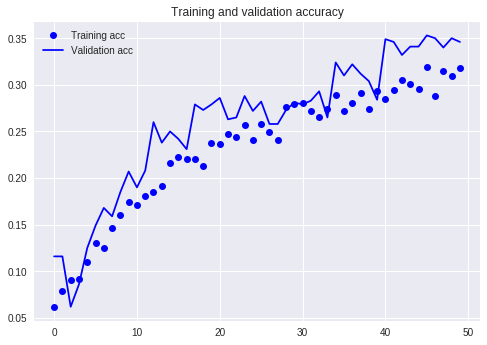

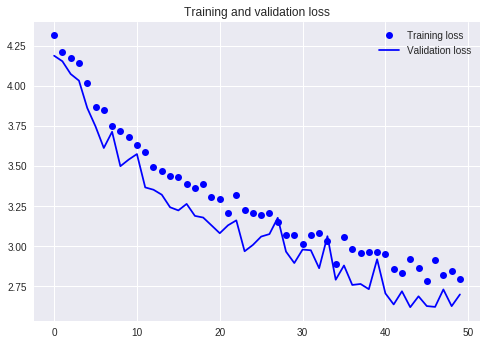

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [40]:
print(test_dir)
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        classes=None,
        class_mode=None)


/content/plankton/test
Found 130400 images belonging to 1 classes.


In [0]:
from keras.models import load_model
saved_model = load_model('plankton_1.h5')

In [0]:
import numpy as np
res = model.predict_generator(test_generator)


In [30]:
len(test_generator.filenames)

130400

In [0]:
import pandas as pd
df = pd.DataFrame(data=res, columns=[*train_generator.class_indices])
df['image'] = [x.replace("test/","") for x in test_generator.filenames]


In [43]:
df.to_csv("/content/plankton/result.csv", encoding='utf-8',index=False)
df.head()

,acantharia_protist,acantharia_protist_big_center,acantharia_protist_halo,amphipods,appendicularian_fritillaridae,appendicularian_s_shape,appendicularian_slight_curve,appendicularian_straight,artifacts,artifacts_edge,...,trochophore_larvae,tunicate_doliolid,tunicate_doliolid_nurse,tunicate_partial,tunicate_salp,tunicate_salp_chains,unknown_blobs_and_smudges,unknown_sticks,unknown_unclassified,image
0,7.951080e-08,5.425323e-11,6.608449e-07,2.957938e-08,1.274279e-08,0.000030,0.000085,0.000073,1.046665e-09,0.000397,...,2.990325e-07,0.013260,0.004956,0.000370,0.006488,0.000609,3.500268e-07,2.758218e-07,0.000931,1.jpg
1,3.648024e-07,3.253493e-09,9.674113e-06,2.402601e-04,8.745697e-07,0.000228,0.000286,0.000946,1.064056e-08,0.000485,...,6.769559e-06,0.023995,0.026921,0.001970,0.049988,0.001626,4.416941e-04,3.204208e-05,0.015106,10.jpg
2,1.551855e-05,3.134679e-08,1.470028e-04,1.386838e-03,1.918088e-05,0.005364,0.003499,0.004303,1.752042e-07,0.000155,...,6.330460e-05,0.019538,0.022615,0.000659,0.011615,0.000558,3.579333e-03,8.342473e-04,0.025432,100.jpg
3,8.942933e-04,1.655253e-06,2.532298e-03,1.358499e-03,6.365012e-05,0.023184,0.016609,0.012045,6.977491e-05,0.000182,...,1.291663e-04,0.033826,0.011210,0.000127,0.000690,0.000052,1.960835e-02,8.662400e-03,0.018375,1000.jpg
4,8.093542e-06,1.347846e-08,5.689288e-05,3.926903e-03,3.950621e-06,0.002061,0.001335,0.001982,2.060730e-07,0.000046,...,9.217719e-06,0.007381,0.007746,0.000135,0.001799,0.000045,1.463604e-02,9.633444e-04,0.012947,10000.jpg


In [33]:
result2 = pd.read_csv('/content/plankton/result.csv')
result2.columns

Index(['acantharia_protist', 'acantharia_protist_big_center',
       'acantharia_protist_halo', 'amphipods', 'appendicularian_fritillaridae',
       'appendicularian_s_shape', 'appendicularian_slight_curve',
       'appendicularian_straight', 'artifacts', 'artifacts_edge',
       ...
       'trochophore_larvae', 'tunicate_doliolid', 'tunicate_doliolid_nurse',
       'tunicate_partial', 'tunicate_salp', 'tunicate_salp_chains',
       'unknown_blobs_and_smudges', 'unknown_sticks', 'unknown_unclassified',
       'image'],
      dtype='object', length=122)

In [44]:
!kaggle competitions submit -c datasciencebowl -f /content/plankton/result.csv -m "50 epoch + augmented data generation"

Successfully submitted to National Data Science Bowl